<a href="https://colab.research.google.com/github/evolution64/Project/blob/main/section4_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install category-encoders
!pip install pdpbox
!pip install eli5
!pip install xgboost

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 글씨체 설치

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

# 1. 기존 자료 불러오기
##  - 기간 : 2013. 6. 4. ~ 2021. 8. 31.



In [5]:
from google.colab import drive 
drive.mount('/content/gdrive/')
# 구글드라이브 연동


Mounted at /content/gdrive/


In [6]:
df_raw = pd.read_csv("/content/gdrive/MyDrive/Codestates/df_raw.csv", thousands=',', encoding = 'unicode_escape')
df_raw

,Date,NYSE,NASDAQ,snp500,FTSE,SSE,STI,N225,KOSPI,Aussie_SnP_ASX,dollar_futures_index,USD_KRW_ER,EUR_KRW_ER,CNY_KRW_ER,JPY_KRW_ER,KRX_Constructions,»ï¼º¹°»ê,Çö´ë°Ç¼³,DL_EnC,ÇÑ±¹Á¶¼±ÇØ¾ç,»ï¼ºÁß°ø¾÷,´ë¿ìÁ¶¼±ÇØ¾ç,Çö´ëÂ÷,±â¾ÆÀÚµ¿Â÷,POSCO,µ¿±¹Á¦°­,´ëÇÑÁ¦°­,Gold_futures,Silver_futures,Copper_futures,WTI_futures,Brent_futures,Dubai_futures,KRX_Steel
0,20000103,6762.109863,4131.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.890,1127.50,1157.32,136.17,11.0991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20000104,6543.759766,3901.689941,NaN,NaN,1406.370972,NaN,19002.85938,1059.040039,3093.7,100.100,1122.50,1157.46,135.57,10.8701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.75,NaN,NaN,282.70,5.335,0.8380,25.55,24.39,NaN,NaN
2,20000105,6567.029785,3877.540039,NaN,NaN,1409.682007,NaN,18542.55078,986.309998,3018.7,100.050,1134.50,1170.41,137.02,10.8778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.38,NaN,NaN,281.10,5.170,0.8480,24.91,23.73,NaN,NaN
3,20000106,6635.439941,3727.129883,NaN,NaN,1463.942017,NaN,18168.26953,960.789978,2999.3,100.340,1146.25,1183.39,138.44,10.8830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.50,NaN,NaN,281.40,5.127,0.8450,24.78,23.62,NaN,NaN
4,20000107,6792.669922,3882.620117,NaN,NaN,1516.604004,NaN,18193.41016,948.650024,3023.4,100.500,1137.50,1170.66,137.39,10.7958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.38,NaN,NaN,281.90,5.150,0.8460,24.22,23.09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,20210526,16451.960940,13738.000000,4193.0,7026.899902,3593.360107,NaN,28642.18945,3168.429932,NaN,90.030,1116.61,1361.15,174.67,10.2282,743.19,138500.0,52900.0,133500.0,146500.0,5860.0,33050.0,223500.0,81300.0,NaN,22150.0,20950.0,1903.80,27.907,4.5295,66.21,68.87,66.33,2057.02
6184,20210527,16531.949220,13736.280270,4199.0,7019.700195,3608.850098,3164.820068,28549.00977,3165.510010,NaN,89.959,1118.55,1363.85,175.21,10.1853,759.93,137500.0,56300.0,134000.0,142500.0,5770.0,32700.0,220500.0,80800.0,NaN,22350.0,21100.0,1898.50,27.971,4.6630,66.85,69.46,66.32,2086.04
6185,20210528,16555.660160,13748.740230,4202.5,7022.600098,3600.780029,3178.550049,29149.41016,3188.729980,NaN,89.993,1113.08,1356.96,174.75,10.1272,761.23,138000.0,56100.0,134000.0,143000.0,5880.0,33750.0,232000.0,84700.0,NaN,22650.0,21150.0,1905.30,28.045,4.6775,66.32,69.63,66.28,2118.22
6186,20210530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56100.0,134000.0,143000.0,5880.0,NaN,232000.0,84700.0,NaN,22650.0,21150.0,1906.75,28.058,4.6937,66.59,NaN,NaN,NaN


In [7]:
df_raw.columns

Index(['Date', 'NYSE', 'NASDAQ', 'snp500', 'FTSE', 'SSE', 'STI', 'N225',
       'KOSPI', 'Aussie_SnP_ASX', 'dollar_futures_index', 'USD_KRW_ER',
       'EUR_KRW_ER', 'CNY_KRW_ER', 'JPY_KRW_ER', 'KRX_Constructions',
       '»ï¼º¹°»ê', 'Çö´ë°Ç¼³', 'DL_EnC', 'ÇÑ±¹Á¶¼±ÇØ¾ç', '»ï¼ºÁß°ø¾÷',
       '´ë¿ìÁ¶¼±ÇØ¾ç', 'Çö´ëÂ÷', '±â¾ÆÀÚµ¿Â÷', 'POSCO', 'µ¿±¹Á¦°­', '´ëÇÑÁ¦°­',
       'Gold_futures', 'Silver_futures', 'Copper_futures', 'WTI_futures',
       'Brent_futures', 'Dubai_futures', 'KRX_Steel'],
      dtype='object')

In [8]:
df_raw.rename(columns = {'»ï¼º¹°»ê':'삼성물산', 'Çö´ë°Ç¼³':'현대건설', 'ÇÑ±¹Á¶¼±ÇØ¾ç':'한국조선해양', '»ï¼ºÁß°ø¾÷':'삼성중공업',
       '´ë¿ìÁ¶¼±ÇØ¾ç':'대우조선해양', 'Çö´ëÂ÷':'현대차', '±â¾ÆÀÚµ¿Â÷':'기아자동차', 'µ¿±¹Á¦°­':'동국제강', '´ëÇÑÁ¦°­':'대한제강'}, inplace=True)
df_raw.head()

,Date,NYSE,NASDAQ,snp500,FTSE,SSE,STI,N225,KOSPI,Aussie_SnP_ASX,dollar_futures_index,USD_KRW_ER,EUR_KRW_ER,CNY_KRW_ER,JPY_KRW_ER,KRX_Constructions,삼성물산,현대건설,DL_EnC,한국조선해양,삼성중공업,대우조선해양,현대차,기아자동차,POSCO,동국제강,대한제강,Gold_futures,Silver_futures,Copper_futures,WTI_futures,Brent_futures,Dubai_futures,KRX_Steel
0,20000103,6762.109863,4131.149902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.89,1127.50,1157.32,136.17,11.0991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20000104,6543.759766,3901.689941,NaN,NaN,1406.370972,NaN,19002.85938,1059.040039,3093.7,100.10,1122.50,1157.46,135.57,10.8701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.75,NaN,NaN,282.7,5.335,0.838,25.55,24.39,NaN,NaN
2,20000105,6567.029785,3877.540039,NaN,NaN,1409.682007,NaN,18542.55078,986.309998,3018.7,100.05,1134.50,1170.41,137.02,10.8778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.38,NaN,NaN,281.1,5.170,0.848,24.91,23.73,NaN,NaN
3,20000106,6635.439941,3727.129883,NaN,NaN,1463.942017,NaN,18168.26953,960.789978,2999.3,100.34,1146.25,1183.39,138.44,10.8830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.50,NaN,NaN,281.4,5.127,0.845,24.78,23.62,NaN,NaN
4,20000107,6792.669922,3882.620117,NaN,NaN,1516.604004,NaN,18193.41016,948.650024,3023.4,100.50,1137.50,1170.66,137.39,10.7958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.38,NaN,NaN,281.9,5.150,0.846,24.22,23.09,NaN,NaN


In [9]:
# 전처리 1. target은 KRX_Steel이므로, 기간을 '13. 6. 4. 이후로 잡아준다.
df = df_raw[df_raw['Date'] >= 20130604]
df

,Date,NYSE,NASDAQ,snp500,FTSE,SSE,STI,N225,KOSPI,Aussie_SnP_ASX,dollar_futures_index,USD_KRW_ER,EUR_KRW_ER,CNY_KRW_ER,JPY_KRW_ER,KRX_Constructions,삼성물산,현대건설,DL_EnC,한국조선해양,삼성중공업,대우조선해양,현대차,기아자동차,POSCO,동국제강,대한제강,Gold_futures,Silver_futures,Copper_futures,WTI_futures,Brent_futures,Dubai_futures,KRX_Steel
3688,20130604,9320.080078,3445.260010,1631.25,NaN,2272.416992,NaN,13533.75977,1989.510010,4900.8,82.802,1123.36,1469.41,183.30,11.2308,789.69,91400.0,60400.0,NaN,206500.0,35100.0,27200.0,215000.0,60900.0,71.99,11021.0,6720.0,1397.10,22.400,3.3650,93.31,103.24,NaN,1911.30
3689,20130605,9178.410156,3401.479980,1608.00,NaN,2270.929932,NaN,13014.87012,1959.189941,4835.2,82.612,1119.00,1465.22,182.61,11.2956,775.52,90300.0,59400.0,NaN,203000.0,35400.0,26750.0,210500.0,59500.0,71.15,10501.0,6780.0,1398.40,22.465,3.3670,93.74,103.04,NaN,1877.22
3690,20130606,9260.480469,3424.050049,1622.75,NaN,2242.110107,NaN,12904.01953,NaN,4781.2,81.537,1119.10,1482.41,182.38,11.5419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.45,NaN,NaN,1415.70,22.701,3.3160,94.76,103.61,NaN,NaN
3691,20130607,9355.410156,3469.219971,1638.50,NaN,2210.897949,NaN,12877.53027,1923.849976,4737.7,81.660,1117.62,1477.83,182.22,11.4575,768.91,89900.0,59200.0,NaN,203500.0,35800.0,26500.0,208000.0,59000.0,70.85,10327.0,6800.0,1383.00,21.737,3.2660,96.03,104.56,NaN,1849.23
3692,20130609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.678,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,20210526,16451.960940,13738.000000,4193.00,7026.899902,3593.360107,NaN,28642.18945,3168.429932,NaN,90.030,1116.61,1361.15,174.67,10.2282,743.19,138500.0,52900.0,133500.0,146500.0,5860.0,33050.0,223500.0,81300.0,NaN,22150.0,20950.0,1903.80,27.907,4.5295,66.21,68.87,66.33,2057.02
6184,20210527,16531.949220,13736.280270,4199.00,7019.700195,3608.850098,3164.820068,28549.00977,3165.510010,NaN,89.959,1118.55,1363.85,175.21,10.1853,759.93,137500.0,56300.0,134000.0,142500.0,5770.0,32700.0,220500.0,80800.0,NaN,22350.0,21100.0,1898.50,27.971,4.6630,66.85,69.46,66.32,2086.04
6185,20210528,16555.660160,13748.740230,4202.50,7022.600098,3600.780029,3178.550049,29149.41016,3188.729980,NaN,89.993,1113.08,1356.96,174.75,10.1272,761.23,138000.0,56100.0,134000.0,143000.0,5880.0,33750.0,232000.0,84700.0,NaN,22650.0,21150.0,1905.30,28.045,4.6775,66.32,69.63,66.28,2118.22
6186,20210530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56100.0,134000.0,143000.0,5880.0,NaN,232000.0,84700.0,NaN,22650.0,21150.0,1906.75,28.058,4.6937,66.59,NaN,NaN,NaN


In [10]:
# 전처리 2. 결측값이 너무 많은 column 버리기 / 다른 column은 ffill을 이용하여 전일가를 빈칸에 넣어주기
df.isnull().sum(), df.shape

(Date                       0
 NYSE                     488
 NASDAQ                   488
 snp500                   506
 FTSE                    2218
 SSE                      558
 STI                     2219
 N225                     546
 KOSPI                    544
 Aussie_SnP_ASX           894
 dollar_futures_index     436
 USD_KRW_ER               415
 EUR_KRW_ER               415
 CNY_KRW_ER               415
 JPY_KRW_ER               415
 KRX_Constructions        537
 삼성물산                     356
 현대건설                     209
 DL_EnC                  2404
 한국조선해양                   277
 삼성중공업                    184
 대우조선해양                   629
 현대차                      203
 기아자동차                    206
 POSCO                    874
 동국제강                     325
 대한제강                     434
 Gold_futures             392
 Silver_futures            12
 Copper_futures           452
 WTI_futures              399
 Brent_futures            437
 Dubai_futures            718
 KRX_Steel

In [11]:
# 전처리 2-1. 결측치가 많은 FTSE, STI, DL_EnC는 버리기 
df = df.drop(['FTSE', 'STI', 'DL_EnC'], axis=1)
df.columns

Index(['Date', 'NYSE', 'NASDAQ', 'snp500', 'SSE', 'N225', 'KOSPI',
       'Aussie_SnP_ASX', 'dollar_futures_index', 'USD_KRW_ER', 'EUR_KRW_ER',
       'CNY_KRW_ER', 'JPY_KRW_ER', 'KRX_Constructions', '삼성물산', '현대건설',
       '한국조선해양', '삼성중공업', '대우조선해양', '현대차', '기아자동차', 'POSCO', '동국제강', '대한제강',
       'Gold_futures', 'Silver_futures', 'Copper_futures', 'WTI_futures',
       'Brent_futures', 'Dubai_futures', 'KRX_Steel'],
      dtype='object')

In [12]:
# 전처리 2-2. fillna(mothod='ffill') 적용
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')
df.isnull().sum()

Date                    0
NYSE                    0
NASDAQ                  0
snp500                  0
SSE                     0
N225                    0
KOSPI                   0
Aussie_SnP_ASX          0
dollar_futures_index    0
USD_KRW_ER              0
EUR_KRW_ER              0
CNY_KRW_ER              0
JPY_KRW_ER              0
KRX_Constructions       0
삼성물산                    0
현대건설                    0
한국조선해양                  0
삼성중공업                   0
대우조선해양                  0
현대차                     0
기아자동차                   0
POSCO                   0
동국제강                    0
대한제강                    0
Gold_futures            0
Silver_futures          0
Copper_futures          0
WTI_futures             0
Brent_futures           0
Dubai_futures           0
KRX_Steel               0
dtype: int64

In [13]:
df.to_csv("./df_preprocessed.csv",index=False)
# 전처리 파일 저장

# 2. 데이터 분석하기
## 2-1. 상관계수 확인하기

In [14]:
# 상관계수를 구하고, 히트맵을 그려보자.
df_corr = df.corr()
df_corr

,Date,NYSE,NASDAQ,snp500,SSE,N225,KOSPI,Aussie_SnP_ASX,dollar_futures_index,USD_KRW_ER,EUR_KRW_ER,CNY_KRW_ER,JPY_KRW_ER,KRX_Constructions,삼성물산,현대건설,한국조선해양,삼성중공업,대우조선해양,현대차,기아자동차,POSCO,동국제강,대한제강,Gold_futures,Silver_futures,Copper_futures,WTI_futures,Brent_futures,Dubai_futures,KRX_Steel
Date,1.000000,0.831268,0.914092,0.937175,0.390419,0.863232,0.604893,0.886009,0.532637,0.475285,-0.267196,-0.409294,0.323415,-0.557120,0.142791,-0.334784,-0.553047,-0.793743,-0.274677,-0.454109,-0.201324,-0.401303,-0.049382,0.246322,0.722763,0.232914,0.189221,-0.555718,-0.538904,-0.512651,-0.623814
NYSE,0.831268,1.000000,0.902785,0.947880,0.376280,0.929509,0.838973,0.827667,0.225042,0.065238,-0.185217,-0.478762,0.044067,-0.158586,0.093467,-0.049977,-0.283856,-0.553755,-0.207622,-0.093119,0.091922,-0.117927,0.218463,0.396260,0.645270,0.398341,0.559244,-0.187773,-0.175193,-0.151293,-0.245879
NASDAQ,0.914092,0.902785,1.000000,0.985976,0.376884,0.914050,0.777238,0.881374,0.277644,0.275731,-0.079497,-0.325597,0.268833,-0.368435,0.092842,-0.258894,-0.418550,-0.602050,-0.259613,-0.128152,0.133190,-0.343862,0.072012,0.341663,0.842135,0.510929,0.459368,-0.363311,-0.358484,-0.335142,-0.515754
snp500,0.937175,0.947880,0.985976,1.000000,0.386726,0.936355,0.771902,0.900720,0.331705,0.279698,-0.150818,-0.396646,0.231798,-0.367669,0.097940,-0.227360,-0.424987,-0.649481,-0.259990,-0.201627,0.052815,-0.312216,0.086793,0.338867,0.788823,0.430962,0.438151,-0.365912,-0.356154,-0.330808,-0.487109
SSE,0.390419,0.376280,0.376884,0.386726,1.000000,0.574073,0.415527,0.303564,0.616030,0.289078,-0.659224,0.101231,-0.367549,-0.305292,0.792314,-0.501735,-0.554140,-0.611650,0.422836,-0.357252,-0.124873,-0.393321,-0.071777,0.428198,0.181840,-0.022901,-0.107367,-0.644191,-0.649692,-0.645831,-0.045620
N225,0.863232,0.929509,0.914050,0.936355,0.574073,1.000000,0.819520,0.798922,0.416489,0.237333,-0.315953,-0.316831,-0.037140,-0.290383,0.320015,-0.227895,-0.457775,-0.680317,-0.111393,-0.230942,0.016130,-0.285357,0.096719,0.421714,0.607875,0.290779,0.408092,-0.409255,-0.394320,-0.369758,-0.344344
KOSPI,0.604893,0.838973,0.777238,0.771902,0.415527,0.819520,1.000000,0.533984,0.008546,-0.160961,-0.082770,-0.312612,-0.078201,0.038127,0.275074,-0.022709,-0.105841,-0.368240,-0.159640,0.214756,0.305132,0.041291,0.493409,0.678324,0.546088,0.572026,0.700016,-0.096382,-0.105625,-0.101148,0.083596
Aussie_SnP_ASX,0.886009,0.827667,0.881374,0.900720,0.303564,0.798922,0.533984,1.000000,0.341882,0.327344,-0.128272,-0.431965,0.309385,-0.422798,-0.071836,-0.206293,-0.387713,-0.559274,-0.200056,-0.277588,-0.085724,-0.272212,-0.111150,0.069684,0.795409,0.310916,0.310231,-0.329978,-0.306708,-0.276051,-0.603540
dollar_futures_index,0.532637,0.225042,0.277644,0.331705,0.616030,0.416489,0.008546,0.341882,1.000000,0.745827,-0.794765,-0.073077,-0.013473,-0.637294,0.567413,-0.513413,-0.708668,-0.827260,0.176966,-0.827578,-0.537285,-0.610255,-0.290166,0.139737,0.038996,-0.399079,-0.559623,-0.858518,-0.846238,-0.831154,-0.439821
USD_KRW_ER,0.475285,0.065238,0.275731,0.279698,0.289078,0.237333,-0.160961,0.327344,0.745827,1.000000,-0.207552,0.287326,0.462436,-0.723876,0.245646,-0.598242,-0.583633,-0.583386,-0.071655,-0.656507,-0.321816,-0.756079,-0.335490,0.010525,0.204237,-0.222325,-0.517655,-0.717115,-0.716783,-0.703865,-0.691051


In [15]:
# KRX_Steel에 대한 상관계수
display(df_corr['KRX_Steel'])
# 음의 상관관계 : NASDAQ, 호주주가, 달러환율, 엔화환율과 음의 상관관계에 있다.
# 양의 상관관계 : 한국건설지수, 건설/조선/제강업체 및 타 선물과 양의 상관관계가 있다..

Date                   -0.623814
NYSE                   -0.245879
NASDAQ                 -0.515754
snp500                 -0.487109
SSE                    -0.045620
N225                   -0.344344
KOSPI                   0.083596
Aussie_SnP_ASX         -0.603540
dollar_futures_index   -0.439821
USD_KRW_ER             -0.691051
EUR_KRW_ER             -0.000457
CNY_KRW_ER              0.034625
JPY_KRW_ER             -0.582706
KRX_Constructions       0.683212
삼성물산                    0.118924
현대건설                    0.458232
한국조선해양                  0.513764
삼성중공업                   0.469299
대우조선해양                  0.238847
현대차                     0.482477
기아자동차                   0.196048
POSCO                   0.669009
동국제강                    0.587691
대한제강                    0.350180
Gold_futures           -0.543663
Silver_futures         -0.033054
Copper_futures          0.290770
WTI_futures             0.494851
Brent_futures           0.476240
Dubai_futures           0.452109
KRX_Steel 

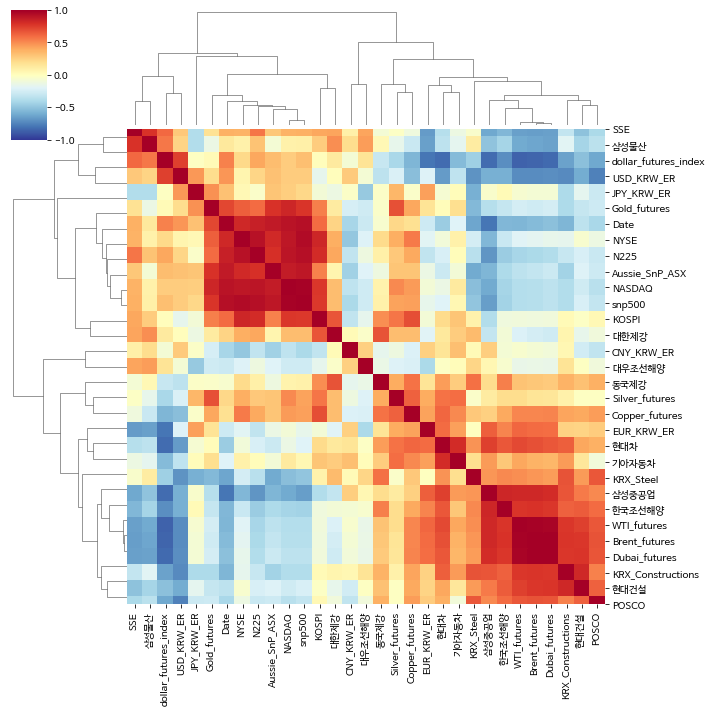

In [16]:
# 히트맵 : 
sns.clustermap(df_corr, annot = False, cmap = 'RdYlBu_r', vmin = -1, vmax = 1);
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

## 2-2. train/validation/test dataset 지정
####    * Train : '13. 6. ~ '18. 12.
####    * Validation : '19. 1. ~ '20. 12.
####    * Test : '21. 1. ~ '21. 5.

In [17]:
df.columns

Index(['Date', 'NYSE', 'NASDAQ', 'snp500', 'SSE', 'N225', 'KOSPI',
       'Aussie_SnP_ASX', 'dollar_futures_index', 'USD_KRW_ER', 'EUR_KRW_ER',
       'CNY_KRW_ER', 'JPY_KRW_ER', 'KRX_Constructions', '삼성물산', '현대건설',
       '한국조선해양', '삼성중공업', '대우조선해양', '현대차', '기아자동차', 'POSCO', '동국제강', '대한제강',
       'Gold_futures', 'Silver_futures', 'Copper_futures', 'WTI_futures',
       'Brent_futures', 'Dubai_futures', 'KRX_Steel'],
      dtype='object')

In [18]:
target = 'KRX_Steel'
features = ['Date', 'NYSE', 'NASDAQ', 'snp500', 'SSE', 'N225', 'KOSPI',
       'Aussie_SnP_ASX', 'dollar_futures_index', 'USD_KRW_ER', 'EUR_KRW_ER',
       'CNY_KRW_ER', 'JPY_KRW_ER', 'KRX_Constructions', '삼성물산', '현대건설',
       '한국조선해양', '삼성중공업', '대우조선해양', '현대차', '기아자동차', 'POSCO', '동국제강', '대한제강',
       'Gold_futures', 'Silver_futures', 'Copper_futures', 'WTI_futures',
       'Brent_futures', 'Dubai_futures']
# target과 feature 지정

# 시간에 따른 한국 철강 선물(KRX_Steel)의 가격 변동을 보는 것이 목적이므로, Cross Validation이 아닌 Holdout Prediction을 사용한다.
# test : '13. 6. ~ '18. 12.
train = df.query("Date <= 20181231")
# validation : '19. 1. ~ '20. 12.
val = df.query("Date >= 20190101 and Date <= 20201231")
# test : '21. 1. ~ '21. 5.
test = df.query("Date >= 20210101")


# 각 데이터셋을 target과 feature로 구분
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]


## 2-3. Baseline Model : Multiple Linear Regression

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 모델 학습
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred_lr = linear.predict(X_train)
mae_lr_train = mean_absolute_error(y_train, y_pred_lr)

# test
y_test_pred_lr = linear.predict(X_test)
mae_lr_test = mean_absolute_error(y_test, y_test_pred_lr)

# R² score 출력
print('Decision Tree의 train 데이터 R² : ', r2_score(y_train, y_pred_lr))
print('Decision Tree의 train 데이터 MAE : ', mae_lr_train)
print('Decision Tree의 test 데이터 R² : ', r2_score(y_test, y_test_pred_lr))
print('Decision Tree의 test 데이터 MAE : ', mae_lr_test)
# R²score 확인 결과 다중선형회귀의 train은 설명력이 좋으나, test에 대한 설명력은 떨어지는 것을 확인할 수 있다.

Decision Tree의 train 데이터 R² :  0.9438696908467167
Decision Tree의 train 데이터 MAE :  33.72323649280594
Decision Tree의 test 데이터 R² :  -0.25555539215903544
Decision Tree의 test 데이터 MAE :  299.43775870610733


## 2-4. Decision Tree Regression

In [55]:
import graphviz
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# pipeline을 활용하여 모델 정의하기
pipe_dtr = make_pipeline(
    SimpleImputer(), 
    StandardScaler(), 
    DecisionTreeRegressor(max_depth=13, criterion="mae")
)

# 모델 학습
pipe_dtr.fit(X_train, y_train)

# 예측값 출력
y_pred_train_dtr = pipe_dtr.predict(X_train)
y_pred_val_dtr = pipe_dtr.predict(X_val)
y_pred_test_dtr = pipe_dtr.predict(X_test)

# R² score 출력
print('Decision Tree의 train 데이터 R² : ', r2_score(y_train, y_pred_train_dtr))
print('Decision Tree의 validation 데이터 R² : ', r2_score(y_val, y_pred_val_dtr))
print('Decision Tree의 test 데이터 R² : ', r2_score(y_test, y_pred_test_dtr))
# Train은 1에 가까운 반면에 validation과 test는 음수인 것으로 보아 전형적인 과적합 모델이다.

Decision Tree의 train 데이터 R² :  0.9971666157309116
Decision Tree의 validation 데이터 R² :  -1.5857497073479814
Decision Tree의 test 데이터 R² :  -0.3895041754739057


## 2-5. Ensenble Regression(XGBoost)

In [22]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor


boosting = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror',
    learning_rate=0.2,
    n_jobs=-1
)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

boosting.fit(X_train, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=20
         )

[0]	validation_0-rmse:1502.53	validation_1-rmse:955.223
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:1204.09	validation_1-rmse:710.956
[2]	validation_0-rmse:965.342	validation_1-rmse:523.825
[3]	validation_0-rmse:774.069	validation_1-rmse:365.149
[4]	validation_0-rmse:621.055	validation_1-rmse:270.23
[5]	validation_0-rmse:498.607	validation_1-rmse:205.446
[6]	validation_0-rmse:400.703	validation_1-rmse:175.206
[7]	validation_0-rmse:322.569	validation_1-rmse:178.584
[8]	validation_0-rmse:260.25	validation_1-rmse:205.978
[9]	validation_0-rmse:210.203	validation_1-rmse:228.987
[10]	validation_0-rmse:170.188	validation_1-rmse:252.883
[11]	validation_0-rmse:138.691	validation_1-rmse:273.282
[12]	validation_0-rmse:113.555	validation_1-rmse:288.038
[13]	validation_0-rmse:93.9789	validation_1-rmse:303.491
[14]	validation_0-rmse:78.5728	validation_1-rmse:310.80

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [23]:
y_pred_xgb = boosting.predict(X_val)
print('XGBoost의 검증데이터 R² : ', r2_score(y_val, y_pred_xgb))
y_pred_xgbt = boosting.predict(X_test)
print('XGBoost의 테스트데이터 R² : ', r2_score(y_test, y_pred_xgbt))
# 여전히 음수인 걸 보니, XGBooster의 예측력도 Baseline Model보다 못하다.

XGBoost의 검증데이터 R² :  0.1954408019235946
XGBoost의 테스트데이터 R² :  -2.0894960262683293


## 2-6. Deep Learning(LSTM)

In [24]:
df.columns, len(df.columns)

(Index(['Date', 'NYSE', 'NASDAQ', 'snp500', 'SSE', 'N225', 'KOSPI',
        'Aussie_SnP_ASX', 'dollar_futures_index', 'USD_KRW_ER', 'EUR_KRW_ER',
        'CNY_KRW_ER', 'JPY_KRW_ER', 'KRX_Constructions', '삼성물산', '현대건설',
        '한국조선해양', '삼성중공업', '대우조선해양', '현대차', '기아자동차', 'POSCO', '동국제강', '대한제강',
        'Gold_futures', 'Silver_futures', 'Copper_futures', 'WTI_futures',
        'Brent_futures', 'Dubai_futures', 'KRX_Steel'],
       dtype='object'), 31)

In [25]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['NYSE', 'NASDAQ', 'snp500', 'SSE', 'N225', 'KOSPI',
       'Aussie_SnP_ASX', 'dollar_futures_index', 'USD_KRW_ER', 'EUR_KRW_ER',
       'CNY_KRW_ER', 'JPY_KRW_ER', 'KRX_Constructions', '삼성물산', '현대건설',
       '한국조선해양', '삼성중공업', '대우조선해양', '현대차', '기아자동차', 'POSCO', '동국제강', '대한제강',
       'Gold_futures', 'Silver_futures', 'Copper_futures', 'WTI_futures',
       'Brent_futures', 'Dubai_futures', 'KRX_Steel']
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols
df_scaled.index = df['Date']
df_scaled = df_scaled.rename_axis('Date').reset_index()

display(df_scaled)

,Date,NYSE,NASDAQ,snp500,SSE,N225,KOSPI,Aussie_SnP_ASX,dollar_futures_index,USD_KRW_ER,EUR_KRW_ER,CNY_KRW_ER,JPY_KRW_ER,KRX_Constructions,삼성물산,현대건설,한국조선해양,삼성중공업,대우조선해양,현대차,기아자동차,POSCO,동국제강,대한제강,Gold_futures,Silver_futures,Copper_futures,WTI_futures,Brent_futures,Dubai_futures,KRX_Steel
0,20130604,0.069461,0.011509,0.024445,0.100240,0.060390,0.296859,0.111827,0.150170,0.433466,0.849105,0.767354,0.754255,0.946698,0.212528,0.687291,0.630963,0.753741,0.109077,0.739583,0.49250,0.656193,0.340960,0.146365,0.316060,0.573994,0.495303,0.883774,0.862562,0.967422,0.703358
1,20130605,0.051328,0.007462,0.015701,0.099777,0.031599,0.279936,0.081860,0.142408,0.416904,0.837606,0.743643,0.775344,0.920490,0.204325,0.670569,0.615212,0.760811,0.106953,0.717262,0.47500,0.642302,0.319446,0.149254,0.317319,0.577573,0.496026,0.886677,0.860506,0.967422,0.683125
2,20130606,0.061833,0.009548,0.021249,0.090817,0.025448,0.279936,0.057192,0.098493,0.417284,0.884784,0.735739,0.855502,0.920490,0.204325,0.670569,0.615212,0.760811,0.106953,0.717262,0.47500,0.647263,0.319446,0.149254,0.334076,0.590571,0.477601,0.893561,0.866365,0.967422,0.683125
3,20130607,0.073983,0.013723,0.027172,0.081113,0.023979,0.260211,0.037321,0.103517,0.411662,0.872214,0.730241,0.828034,0.908265,0.201342,0.667224,0.617462,0.770237,0.105774,0.704861,0.46875,0.637341,0.312247,0.150217,0.302402,0.537479,0.459538,0.902133,0.876131,0.967422,0.666508
4,20130609,0.073983,0.013723,0.027172,0.081113,0.023979,0.260211,0.037321,0.103517,0.411662,0.872214,0.730241,0.828034,0.908265,0.201342,0.667224,0.617462,0.770237,0.105774,0.704861,0.46875,0.637341,0.312247,0.150217,0.302402,0.534229,0.459538,0.902133,0.876131,0.967422,0.666508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,20210526,0.982277,0.962953,0.987871,0.510938,0.898706,0.954863,1.000000,0.445443,0.407825,0.551982,0.470790,0.427962,0.860697,0.563758,0.561873,0.360936,0.064687,0.136682,0.781746,0.74750,0.238631,0.801407,0.831488,0.806858,0.877293,0.916004,0.700864,0.509252,0.538330,0.789868
2496,20210527,0.992515,0.962794,0.990128,0.515754,0.893536,0.953233,1.000000,0.442543,0.415195,0.559392,0.489347,0.414001,0.891657,0.556301,0.618729,0.342934,0.062566,0.135031,0.766865,0.74125,0.238631,0.809681,0.838710,0.801724,0.880817,0.964234,0.705184,0.515317,0.538216,0.807097
2497,20210528,0.995550,0.963945,0.991444,0.513245,0.926850,0.966193,1.000000,0.443932,0.394416,0.540482,0.473540,0.395092,0.894061,0.560030,0.615385,0.345185,0.065158,0.139985,0.823909,0.79000,0.238631,0.822094,0.841117,0.808311,0.884893,0.969473,0.701606,0.517064,0.537761,0.826201
2498,20210530,0.995550,0.963945,0.991444,0.513245,0.926850,0.966193,1.000000,0.443932,0.394416,0.540482,0.473540,0.395092,0.894061,0.560030,0.615385,0.345185,0.065158,0.139985,0.823909,0.79000,0.238631,0.822094,0.841117,0.809715,0.885609,0.975325,0.703429,0.517064,0.537761,0.826201


In [26]:
# train/validation/test dataset 나누기
train_scaled = df_scaled.query("Date <= 20181231")
# validation : '19. 1. ~ '20. 12.
val_scaled = df_scaled.query("Date >= 20190101 and Date <= 20201231")
# test : '21. 1. ~ '21. 5.
test_scaled = df_scaled.query("Date >= 20210101")


# 각 데이터셋을 target과 feature로 구분
X_train_scaled = train_scaled[features]
y_train_scaled = train_scaled[target]
X_val_scaled = val_scaled[features]
y_val_scaled = val_scaled[target]
X_test_scaled = test_scaled[features]
y_test_scaled = test_scaled[target]


In [27]:
# 날짜를 인덱스로 지정
X_train_scaled = X_train_scaled.set_index('Date')
X_val_scaled = X_val_scaled.set_index('Date')
X_test_scaled = X_test_scaled.set_index('Date')


In [28]:
# 며칠(window size)을 기준으로 향후 가격을 예측할지 지정
def make_dataset(data, label, window_size=30):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)


In [29]:
# dataset 지정
train_feature, train_label = make_dataset(X_train_scaled, y_train_scaled, 30)
val_feature, val_label = make_dataset(X_val_scaled, y_val_scaled, 30)
test_feature, test_label = make_dataset(X_test_scaled, y_test_scaled, 30)

In [30]:
train_feature.shape, val_feature.shape, test_feature.shape

((1714, 30, 29), (597, 30, 29), (99, 30, 29))

In [31]:
# keras를 활용한 LSTM 모델 생성
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LambdaCallback
import tensorflow as tf
import os

lstm = Sequential()
lstm.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='tanh', 
               return_sequences=False, dropout=0.2)
          )
lstm.add(Dense(1, kernel_initializer='normal'))

# compile을 통한 학습 기준 설정
lstm.compile(loss='mean_squared_error', optimizer='adam')

# 과적합 방지를 위한 early stop 적용 및 check point 파일에 저장
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=5)
filename = 'checkpoint-epoch-{}-batch-{}-trial-001.hdf5'.format(200, 30)
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                2944      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 2,961
Trainable params: 2,961
Non-trainable params: 0
_________________________________________________________________


In [32]:
# fit을 통한 모델 학습
history = lstm.fit(train_feature, train_label, 
                    epochs=200,
                    batch_size=30,
                    validation_data=(val_feature, val_label),
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
58/58 [==============================] - 4s 25ms/step - loss: 0.1380 - val_loss: 0.1764

Epoch 00001: val_loss improved from inf to 0.17644, saving model to checkpoint-epoch-200-batch-30-trial-001.hdf5
Epoch 2/200
58/58 [==============================] - 1s 15ms/step - loss: 0.0095 - val_loss: 0.1375

Epoch 00002: val_loss improved from 0.17644 to 0.13748, saving model to checkpoint-epoch-200-batch-30-trial-001.hdf5
Epoch 3/200
58/58 [==============================] - 1s 16ms/step - loss: 0.0082 - val_loss: 0.1364

Epoch 00003: val_loss improved from 0.13748 to 0.13638, saving model to checkpoint-epoch-200-batch-30-trial-001.hdf5
Epoch 4/200
58/58 [==============================] - 1s 15ms/step - loss: 0.0069 - val_loss: 0.1223

Epoch 00004: val_loss improved from 0.13638 to 0.12233, saving model to checkpoint-epoch-200-batch-30-trial-001.hdf5
Epoch 5/200
58/58 [==============================] - 1s 16ms/step - loss: 0.0059 - val_loss: 0.0942

Epoch 00005: val_loss improved 

In [36]:
import math
from sklearn.metrics import mean_squared_error

# test dataset 정확도 확인
y_pred_train_lstm = lstm.predict(train_feature)
y_pred_val_lstm = lstm.predict(val_feature)
y_pred_test_lstm = lstm.predict(test_feature)

# RMSE점수 확인
print('LSTM의 train 데이터 R² : ', r2_score(train_label, y_pred_train_lstm))
print('LSTM의 validation 데이터 R² : ', r2_score(val_label, y_pred_val_lstm))
print('LSTM의 test 데이터 R² : ', r2_score(test_label, y_pred_test_lstm))
# R²이 1에 가까울수록 설명력이 좋으므로, 0.44는 그렇게 좋다고는 볼 수 없다.

LSTM의 train 데이터 R² :  0.9054622721758064
LSTM의 validation 데이터 R² :  -2.4672619109998335
LSTM의 test 데이터 R² :  0.4409700852649737


## 2-7. 시각화

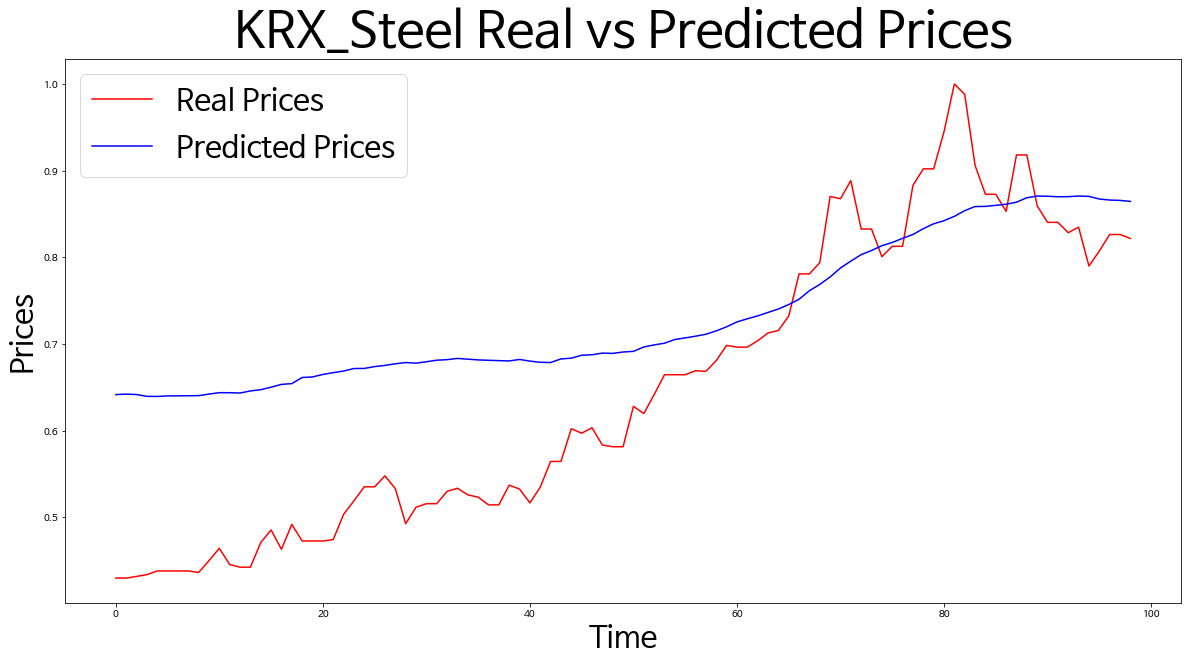

In [60]:
plt.figure(figsize=(20,10))
plt.plot(test_label,'red',label='Real Prices')
plt.plot(y_pred_test_lstm,'blue',label='Predicted Prices')
plt.xlabel('Time', fontsize=30)
plt.ylabel('Prices', fontsize=30)
plt.title('KRX_Steel Real vs Predicted Prices', fontsize=50)
plt.legend(loc='best', fontsize=30);